* Applicant's name: Nghi Tran
* Email: nghtran@abo.fi 
* Phone number: +358 457 83 44166


## Choosing the data

* **Time series.** Consider the flow of orders in the attached file as a process fluctuating in time.

You don't have to limit your choices to these, and you can also freely combine and enrich datasets.

## Choosing the approach
Armed with a dataset, come up with a modeling task that is relevant to Wolt. To give you an idea what we are looking for, the task might look something like these:

* How many orders are we going to get tomorrow? Or next week?
ment is that your approach will result in some kind of predictive model. Choose a task that properly showcases your skills!

## Working with the data
### Exploration
Produce interesting statistics and graphs about the dataset. Show the most important features and explain what you see. 


I choose the option 1: Time series: Time series. Consider the flow of orders in the attached file as a process fluctuating in time.
How many orders are we going to get tomorrow? Or next week?

In [5]:
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.tsa.seasonal 
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import datetime
from IPython.display import display, HTML  
from sklearn import linear_model
from sklearn import datasets
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [6]:
df= pd.read_csv('orders_autumn_2020.csv', parse_dates= ['TIMESTAMP'], index_col=['TIMESTAMP'])
df

,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
TIMESTAMP,,,,,,,,,,,,
2020-08-01 06:07:00,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0
2020-08-01 06:17:00,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0
2020-08-01 06:54:00,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0
2020-08-01 07:09:00,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0
2020-08-01 07:10:00,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 19:27:00,-1,1,60.170,24.946,60.170,24.945,24,23,0.0,12.8,2.34419,0.0
2020-09-30 19:36:00,-8,6,60.185,24.944,60.178,24.949,23,15,0.0,12.8,2.34419,0.0
2020-09-30 19:39:00,-14,3,60.186,24.949,60.188,24.956,25,11,0.0,12.8,2.34419,0.0


First I will clean the data, there will be two figures that I need: TIMESTAMP and ITEM_COUNT

In [7]:
number_of_item= df.iloc[:,:3]
number_of_item

,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT
TIMESTAMP,,,
2020-08-01 06:07:00,-19,1,60.158
2020-08-01 06:17:00,-7,8,60.163
2020-08-01 06:54:00,-17,4,60.161
2020-08-01 07:09:00,-2,3,60.185
2020-08-01 07:10:00,-1,2,60.182
...,...,...,...
2020-09-30 19:27:00,-1,1,60.170
2020-09-30 19:36:00,-8,6,60.185
2020-09-30 19:39:00,-14,3,60.186


In [8]:
df.describe()

,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
count,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18429.000000,18429.000000,18429.000000,18706.000000
mean,-1.201058,2.688228,60.175234,24.941244,60.175643,24.941214,33.809313,32.608254,11.996853,16.973536,3.790991,0.332756
std,8.979834,1.886455,0.012674,0.016540,0.011509,0.014482,7.340283,10.018879,23.812605,3.411900,1.456017,1.129234
min,-41.000000,1.000000,60.153000,24.909000,60.149000,24.878000,10.000000,6.000000,0.000000,6.100000,0.077419,0.000000
25%,-7.000000,1.000000,60.163000,24.926000,60.167000,24.930000,28.000000,25.000000,0.000000,14.400000,2.696190,0.000000
50%,-2.000000,2.000000,60.175000,24.943000,60.170000,24.941000,33.000000,32.000000,0.000000,16.700000,3.631970,0.000000
75%,5.000000,4.000000,60.186000,24.954000,60.186000,24.950000,38.000000,40.000000,25.000000,18.900000,4.692530,0.000000
max,34.000000,11.000000,60.201000,24.980000,60.219000,25.042000,82.000000,58.000000,100.000000,26.700000,9.857300,6.315790


In [9]:
df.head()

,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
TIMESTAMP,,,,,,,,,,,,
2020-08-01 06:07:00,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0
2020-08-01 06:17:00,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0
2020-08-01 06:54:00,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0
2020-08-01 07:09:00,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0
2020-08-01 07:10:00,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18706 entries, 2020-08-01 06:07:00 to 2020-09-30 20:04:00
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES  18706 non-null  int64  
 1   ITEM_COUNT                                            18706 non-null  int64  
 2   USER_LAT                                              18706 non-null  float64
 3   USER_LONG                                             18706 non-null  float64
 4   VENUE_LAT                                             18706 non-null  float64
 5   VENUE_LONG                                            18706 non-null  float64
 6   ESTIMATED_DELIVERY_MINUTES                            18706 non-null  int64  
 7   ACTUAL_DELIVERY_MINUTES                               18706 non-null  int64  
 8   CLOUD_COVERAGE       

In [11]:
# I find out the TImestamp index as follow:
timeorder= df.index
timeorder

DatetimeIndex(['2020-08-01 06:07:00', '2020-08-01 06:17:00',
               '2020-08-01 06:54:00', '2020-08-01 07:09:00',
               '2020-08-01 07:10:00', '2020-08-01 07:20:00',
               '2020-08-01 07:33:00', '2020-08-01 07:44:00',
               '2020-08-01 07:59:00', '2020-08-01 08:06:00',
               ...
               '2020-09-30 18:59:00', '2020-09-30 19:02:00',
               '2020-09-30 19:19:00', '2020-09-30 19:20:00',
               '2020-09-30 19:24:00', '2020-09-30 19:27:00',
               '2020-09-30 19:36:00', '2020-09-30 19:39:00',
               '2020-09-30 19:42:00', '2020-09-30 20:04:00'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=18706, freq=None)

Then, I will reshape the data into Day

In [12]:
numberoforderinaday=df.resample('D').sum().iloc[:,:2].drop('ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES',axis=1)
numberoforderinaday


,ITEM_COUNT
TIMESTAMP,
2020-08-01,839
2020-08-02,995
2020-08-03,616
2020-08-04,565
2020-08-05,704
...,...
2020-09-26,1034
2020-09-27,1162
2020-09-28,764


In [13]:
# I want to know the final day having the order in given data:
last_data_set= df.iloc[-1:].index[0]
print('last date having the sales:', last_data_set)

last date having the sales: 2020-09-30 20:04:00


My idea is to use ARIMA model to find the forecast for graph and use LinearRegression() to find the specific prediction values

Because I want to find between Multiplicative and Additive model, which one will be fit best with given data, so I will decompose with two models.

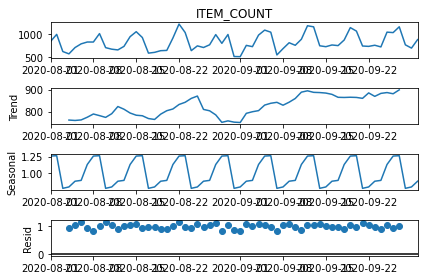

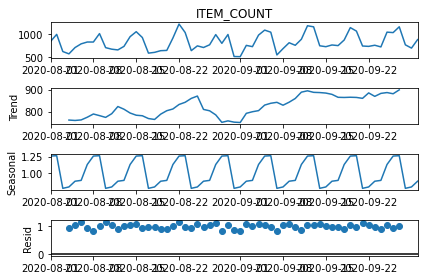

In [14]:
#ETS Decomposition:
result= seasonal_decompose(numberoforderinaday['ITEM_COUNT'], model='multiplicative')
result.plot()

In [15]:
from pmdarima import auto_arima
import warnings 
warnings.filterwarnings('ignore')
value_fit= auto_arima(numberoforderinaday['ITEM_COUNT'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P= 0, seasonal=True, d=None, D=1, trace= True, error_action='ignore', supress_warnings= True, stepwise=True)
value_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=697.249, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=685.919, Time=0.21 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=695.835, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=692.434, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=672.991, Time=1.10 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=672.306, Time=0.59 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=692.309, Time=0.16 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=669.190, Time=0.79 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=677.815, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   61
Model:             SARIMAX(0, 0, 1)x(2, 1, [], 12)   Log Likelihood                -329.595
Date:                             Sun, 31 Jan 2021   AIC                            669.190
Time:                                     18:05:33   BIC                            678.649
Sample:                                          0   HQIC                           672.779
                                              - 61                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     71.1362     59.903      1.188      0.235     -46.271     188.543
ma.L1          0.5104      0.195      2.618      0.009       0.128       0.892
ar.S.L12      -0.6791      0.167     -4.060      0.000      -1.007      -0.351
ar.S.L24      -0.6020      0.178     -3.382      0.001      -0.951      -0.253
sigma2      3.138e+04   7470.985      4.200      0.000    1.67e+04     4.6e+04
===================================================================================
Ljung-Box (Q):                      107.98   Jarque-Bera (JB):                 0.21
Prob(Q):                              0.00   Prob(JB):                         0.90
Heteroskedasticity (H):               0.84   Skew:                             0.09
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

So the best model:  ARIMA(0,0,1)(2,1,0)[12] intercept. I will this value for the seasonal order to Sarimax model

In [17]:
#Fit Arima model
#split data into train and test sets:
train= numberoforderinaday.iloc[:len(numberoforderinaday)-30]
print(pd.DataFrame(train))
test=numberoforderinaday.iloc[len(numberoforderinaday)-30:]
print(test)
#fit a sarimax (0,0,1)(2,1,0)[12]
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train['ITEM_COUNT'], order=(0,0,1), seasonal_order=(2,1,0,12))
result=model.fit()
result.summary()

            ITEM_COUNT
TIMESTAMP             
2020-08-01         839
2020-08-02         995
2020-08-03         616
2020-08-04         565
2020-08-05         704
2020-08-06         786
2020-08-07         826
2020-08-08         826
2020-08-09        1012
2020-08-10         702
2020-08-11         668
2020-08-12         652
2020-08-13         730
2020-08-14         944
2020-08-15        1054
2020-08-16         926
2020-08-17         581
2020-08-18         598
2020-08-19         635
2020-08-20         641
2020-08-21         915
2020-08-22        1223
2020-08-23        1036
2020-08-24         636
2020-08-25         741
2020-08-26         705
2020-08-27         765
2020-08-28         990
2020-08-29         797
2020-08-30         992
2020-08-31         506
            ITEM_COUNT
TIMESTAMP             
2020-09-01         503
2020-09-02         752
2020-09-03         724
2020-09-04         979
2020-09-05        1089
2020-09-06        1043
2020-09-07         541
2020-09-08         680
2020-09-09 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          ITEM_COUNT   No. Observations:                   31
Model:             SARIMAX(0, 0, 1)x(2, 1, [], 12)   Log Likelihood                -129.314
Date:                             Sun, 31 Jan 2021   AIC                            266.628
Time:                                     18:06:55   BIC                            270.405
Sample:                                 08-01-2020   HQIC                           267.267
                                      - 08-31-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6885      0.520      1.324      0.186      -0.331       1.708
ar.S.L12      -0.1863      1.827     -0.102      0.919      -3.768       3.395
ar.S.L24      -0.5754      1.722     -0.334      0.738      -3.950       2.799
sigma2      3.078e+04   9.18e+04      0.335      0.738   -1.49e+05    2.11e+05
===================================================================================
Ljung-Box (Q):                       25.53   Jarque-Bera (JB):                 2.26
Prob(Q):                              0.11   Prob(JB):                         0.32
Heteroskedasticity (H):               1.42   Skew:                             0.83
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

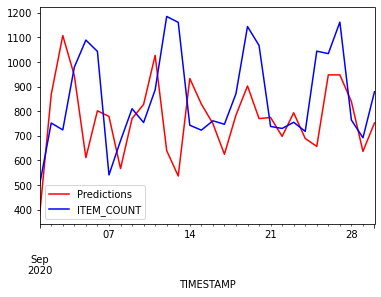

In [18]:
#Plotting the data with multiplicatuve model
start=len(train)
end=len(train) +len(test)-1
#predictions for oneyeat against the test set
predictionsafterthelastdateindata= result.predict(start, end, typ='levels').rename('Predictions')
predictionsafterthelastdateindata.plot(color='r', legend=True)
test['ITEM_COUNT'].plot(color='b', legend=True)

Next, I need to find out the RMSE and MSE value for the multiplicative model

In [19]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
# Find the root mean squared error
root_mean_squared_error= rmse(test['ITEM_COUNT'], predictionsafterthelastdateindata)
print('rmse is', root_mean_squared_error)
mse=mean_squared_error(test['ITEM_COUNT'], predictionsafterthelastdateindata)
print('mse is', mse )

rmse is 237.68569085549652
mse is 56494.48763745466


Next, i will do the same with Additive model

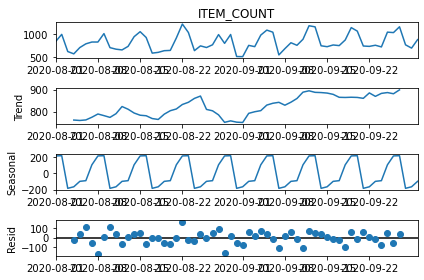

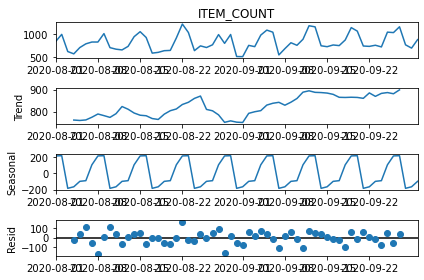

In [20]:
#ETS Decomposition:
result= seasonal_decompose(numberoforderinaday['ITEM_COUNT'], model='additive')
result.plot()

In [21]:

from pmdarima import auto_arima
import warnings 
warnings.filterwarnings('ignore')
value_fit= auto_arima(numberoforderinaday['ITEM_COUNT'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P= 0, seasonal=True, d=None, D=1, trace= True, error_action='ignore', supress_warnings= True, stepwise=True)
value_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=697.249, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=685.919, Time=0.18 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=695.835, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=692.434, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=672.991, Time=1.11 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=672.306, Time=0.50 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=692.309, Time=0.16 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=669.190, Time=0.71 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=677.815, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   61
Model:             SARIMAX(0, 0, 1)x(2, 1, [], 12)   Log Likelihood                -329.595
Date:                             Sun, 31 Jan 2021   AIC                            669.190
Time:                                     18:07:25   BIC                            678.649
Sample:                                          0   HQIC                           672.779
                                              - 61                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     71.1362     59.903      1.188      0.235     -46.271     188.543
ma.L1          0.5104      0.195      2.618      0.009       0.128       0.892
ar.S.L12      -0.6791      0.167     -4.060      0.000      -1.007      -0.351
ar.S.L24      -0.6020      0.178     -3.382      0.001      -0.951      -0.253
sigma2      3.138e+04   7470.985      4.200      0.000    1.67e+04     4.6e+04
===================================================================================
Ljung-Box (Q):                      107.98   Jarque-Bera (JB):                 0.21
Prob(Q):                              0.00   Prob(JB):                         0.90
Heteroskedasticity (H):               0.84   Skew:                             0.09
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
#Fit Arima model
#split data into train and test sets:
train= numberoforderinaday.iloc[:len(numberoforderinaday)-30]
print(pd.DataFrame(train))
test=numberoforderinaday.iloc[len(numberoforderinaday)-30:]
print(test)
#fit a sarimax (0,0,1)(2,1,0)[12]
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(numberoforderinaday['ITEM_COUNT'], order=(0,0,1), seasonal_order=(2,1,0,12))
result=model.fit()
result.summary()

            ITEM_COUNT
TIMESTAMP             
2020-08-01         839
2020-08-02         995
2020-08-03         616
2020-08-04         565
2020-08-05         704
2020-08-06         786
2020-08-07         826
2020-08-08         826
2020-08-09        1012
2020-08-10         702
2020-08-11         668
2020-08-12         652
2020-08-13         730
2020-08-14         944
2020-08-15        1054
2020-08-16         926
2020-08-17         581
2020-08-18         598
2020-08-19         635
2020-08-20         641
2020-08-21         915
2020-08-22        1223
2020-08-23        1036
2020-08-24         636
2020-08-25         741
2020-08-26         705
2020-08-27         765
2020-08-28         990
2020-08-29         797
2020-08-30         992
2020-08-31         506
            ITEM_COUNT
TIMESTAMP             
2020-09-01         503
2020-09-02         752
2020-09-03         724
2020-09-04         979
2020-09-05        1089
2020-09-06        1043
2020-09-07         541
2020-09-08         680
2020-09-09 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          ITEM_COUNT   No. Observations:                   61
Model:             SARIMAX(0, 0, 1)x(2, 1, [], 12)   Log Likelihood                -330.614
Date:                             Sun, 31 Jan 2021   AIC                            669.228
Time:                                     18:07:36   BIC                            676.795
Sample:                                 08-01-2020   HQIC                           672.099
                                      - 09-30-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5419      0.183      2.965      0.003       0.184       0.900
ar.S.L12      -0.6609      0.146     -4.536      0.000      -0.947      -0.375
ar.S.L24      -0.5634      0.176     -3.196      0.001      -0.909      -0.218
sigma2      3.337e+04   8208.234      4.065      0.000    1.73e+04    4.95e+04
===================================================================================
Ljung-Box (Q):                      106.19   Jarque-Bera (JB):                 0.31
Prob(Q):                              0.00   Prob(JB):                         0.86
Heteroskedasticity (H):               0.85   Skew:                             0.18
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

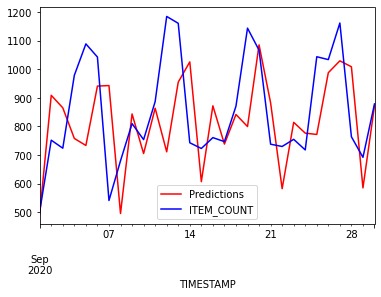

In [23]:
start=len(train)
end=len(train) +len(test)-1
#predictions for oneyeat against the test set
predictionsafterthelastdateindata= result.predict(start, end, typ='levels').rename('Predictions')
predictionsafterthelastdateindata.plot(color='r', legend=True)
test['ITEM_COUNT'].plot(color='b', legend=True)

In [24]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
# Find the root mean squared error
root_mean_squared_error= rmse(test['ITEM_COUNT'], predictionsafterthelastdateindata)
print('RMSE under the additive model is', root_mean_squared_error)
mse=mean_squared_error(test['ITEM_COUNT'], predictionsafterthelastdateindata)
print('MSE under the additive model is', mse )

RMSE under the additive model is 194.69810217670425
MSE under the additive model is 37907.35099121037


I decide to use the Additive model as it has the lower RMSE and MSE value and the gap between Predictions and Actual ( Item_count) seems to less wider than the multiplicative model.

Next, I will forecast the future trend of next day by fitting to the SARIMAX model

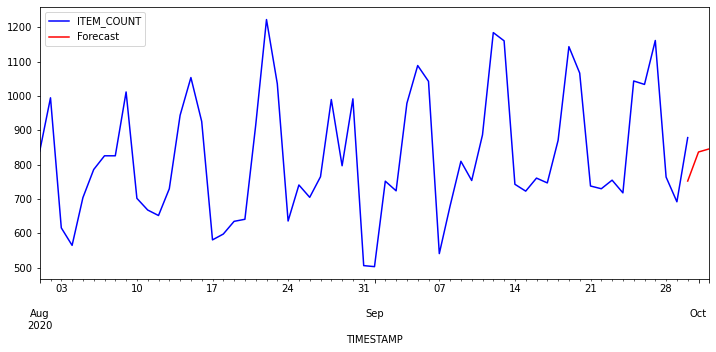

In [25]:
model= SARIMAX(train['ITEM_COUNT'], order=(0,0,1), seasonal_order=(2,1,0,12))
result=model.fit()
#fore cast for the next day
forecastforthenextday=result.predict(start=len(numberoforderinaday)-1, end=(len(numberoforderinaday)+1), typ='levels').rename('Forecast')
numberoforderinaday['ITEM_COUNT'].plot(color='b', figsize=(12,5), legend=True)
forecastforthenextday.plot(color='r', legend=True)

Then, I will find the specific value for the next day after 2020-09-30

Because I want to use LinearRegression to find specific values, I need to have a 2D arrays, which include x and y. Whereas y is the number of item order and X is for the timestamp

In [26]:
y= np.array(numberoforderinaday['ITEM_COUNT'])
pd.DataFrame(y)

,0
0,839
1,995
2,616
3,565
4,704
...,...
56,1034
57,1162
58,764
59,692


I convert the number of Item_count in a day into array, my idea is to have 2d array
I will use the Linear Regression to predict the next values so i have to find the array for current Item_count

In [31]:
y= np.array(numberoforderinaday['ITEM_COUNT'])
y


array([ 839,  995,  616,  565,  704,  786,  826,  826, 1012,  702,  668,
        652,  730,  944, 1054,  926,  581,  598,  635,  641,  915, 1223,
       1036,  636,  741,  705,  765,  990,  797,  992,  506,  503,  752,
        724,  979, 1089, 1043,  541,  680,  810,  754,  887, 1185, 1161,
        743,  723,  761,  747,  871, 1144, 1067,  738,  730,  755,  718,
       1044, 1034, 1162,  764,  692,  879])

Then I will change the Timestamp into numerical values to apply to LinearRegression

In [131]:
datetimeindex=pd.DataFrame(numberoforderinaday.index)
numericaldatetime=pd.to_datetime(datetimeindex['TIMESTAMP']).astype(int)/ 10**9
numericaldatetime


0     1.596240e+09
1     1.596326e+09
2     1.596413e+09
3     1.596499e+09
4     1.596586e+09
          ...     
56    1.601078e+09
57    1.601165e+09
58    1.601251e+09
59    1.601338e+09
60    1.601424e+09
Name: TIMESTAMP, Length: 61, dtype: float64

In [34]:
# I define the x-axix, and change the nummerical datetime in to the array
X=np.array(numericaldatetime)
X

array([1.5962400e+09, 1.5963264e+09, 1.5964128e+09, 1.5964992e+09,
       1.5965856e+09, 1.5966720e+09, 1.5967584e+09, 1.5968448e+09,
       1.5969312e+09, 1.5970176e+09, 1.5971040e+09, 1.5971904e+09,
       1.5972768e+09, 1.5973632e+09, 1.5974496e+09, 1.5975360e+09,
       1.5976224e+09, 1.5977088e+09, 1.5977952e+09, 1.5978816e+09,
       1.5979680e+09, 1.5980544e+09, 1.5981408e+09, 1.5982272e+09,
       1.5983136e+09, 1.5984000e+09, 1.5984864e+09, 1.5985728e+09,
       1.5986592e+09, 1.5987456e+09, 1.5988320e+09, 1.5989184e+09,
       1.5990048e+09, 1.5990912e+09, 1.5991776e+09, 1.5992640e+09,
       1.5993504e+09, 1.5994368e+09, 1.5995232e+09, 1.5996096e+09,
       1.5996960e+09, 1.5997824e+09, 1.5998688e+09, 1.5999552e+09,
       1.6000416e+09, 1.6001280e+09, 1.6002144e+09, 1.6003008e+09,
       1.6003872e+09, 1.6004736e+09, 1.6005600e+09, 1.6006464e+09,
       1.6007328e+09, 1.6008192e+09, 1.6009056e+09, 1.6009920e+09,
       1.6010784e+09, 1.6011648e+09, 1.6012512e+09, 1.6013376e

In [52]:
#Making Prediction
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=0)
regressor= LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)
print('the intercept value is:', regressor.intercept_)
print('the coef_ value is:',regressor.coef_)

the intercept value is: -32797.62909233095
the coef_ value is: [2.10359616e-05]


It seems like that the coef_ value is small so probably the value prediction of next day for the Item count will be correct.

In [37]:
#Making Prediction, I decided to apply the Linear Regression in to find the values of item count in next follwing day, starting from 61th day
predictionofnextday= regressor.predict(X_test.reshape(-1,1))
predictionofnextday


array([828.06939449, 844.42695821, 889.86463521, 831.70440865,
       800.80678829, 784.44922457, 842.60945113, 888.04712813,
       853.51449361, 820.79936617, 788.08423873, 798.98928121,
       835.33942281])

In [38]:
#I converted the array into DataFrame
predictionofnextday=pd.DataFrame(predictionofnextday)
# Because I only need the values for the 61th day so I use .loc[0] to get the first index of presionofnextday
predictionofnextday.loc[0]

0    828.069394
Name: 0, dtype: float64

In [39]:
# And again, I want to find out the last day having the item_count in the given data, so I use .loc[60] to get the final day value
finalday=datetimeindex.loc[60]
finalday

TIMESTAMP   2020-09-30
Name: 60, dtype: datetime64[ns]

In [40]:
# Then, I use the timedelta to find what is the next day after 2020-09-30
import datetime
from datetime import timedelta
nextday= timedelta(days=+1)
nextday= finalday + nextday
nextday=pd.Series(nextday)
nextday

TIMESTAMP   2020-10-01
Name: 60, dtype: datetime64[ns]

In [54]:
# I convert the predictionofnextday into Series with the pupose of combining the nextday value
predictionofnextday= predictionofnextday.loc[0]
predictionofnextday= pd.Series(predictionofnextday)
predictionofnextday


0    828.069394
dtype: float64

In [72]:
# I 
valueinnextday=pd.DataFrame({'Next Day Prediction of Item_Count':
                            predictionofnextday.loc[0]}, index= nextday )
valueinnextday

,Next Day Prediction of Item_Count
60,
2020-10-01,828.069394


In [73]:
## Finally i comebine to the orginal Dataframe
final_prediction_next_day=numberoforderinaday.append(valueinnextday)
final_prediction_next_day

,ITEM_COUNT,Next Day Prediction of Item_Count
2020-08-01,839.0,NaN
2020-08-02,995.0,NaN
2020-08-03,616.0,NaN
2020-08-04,565.0,NaN
2020-08-05,704.0,NaN
...,...,...
2020-09-27,1162.0,NaN
2020-09-28,764.0,NaN
2020-09-29,692.0,NaN
2020-09-30,879.0,NaN


Similartly, now I visualize and predict the number of item in next week

In [90]:
#Reshaping the data in to weeks
numberoforderinaweek=df.resample('W').sum().iloc[:,:2].drop('ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES',axis=1)
numberoforderinaweek


,ITEM_COUNT
TIMESTAMP,
2020-08-02,1834
2020-08-09,5335
2020-08-16,5676
2020-08-23,5629
2020-08-30,5626
2020-09-06,5596
2020-09-13,6018
2020-09-20,6056
2020-09-27,6181


In [114]:
# As similar, we split the data set into:
firstperiodofweeks=numberoforderinaweek.iloc[:len(numberoforderinaweek)-7]
lastperiodofweeks=numberoforderinaweek.iloc[len(numberoforderinaweek)-7:]
firstperiodofweeks
lastperiodofweeks
model= SARIMAX(lastperiodofweeks['ITEM_COUNT'], order=(0,0,1), seasonal_order=(2,1,0,12))
resultinaweek=model.fit()
resultinaweek.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          ITEM_COUNT   No. Observations:                    7
Model:             SARIMAX(0, 0, 1)x(2, 1, [], 12)   Log Likelihood                   0.000
Date:                             Sun, 31 Jan 2021   AIC                              8.000
Time:                                     16:23:38   BIC                                nan
Sample:                                 08-23-2020   HQIC                               nan
                                      - 10-04-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1               0         -0        nan        nan           0           0
ar.S.L12           -0         -0        nan        nan           0          -0
ar.S.L24            0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

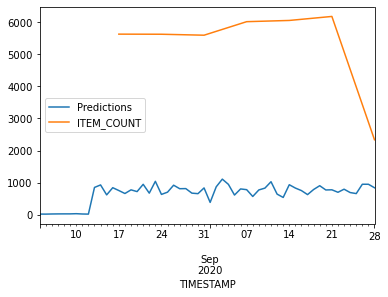

In [115]:
#Plotting the prediction trend:
setoffirstweeks= len(firstperiodofweeks) 
setoflastweeks=  len(firstperiodofweeks) + len(lastperiodofweeks)-1
predictioninaweek=result.predict(setoffirstweeks, setoflastweeks +49 , typ='levels').rename('Predictions') 
predictioninaweek.plot(legend= True)
lastperiodofweeks['ITEM_COUNT'].plot(legend= True)


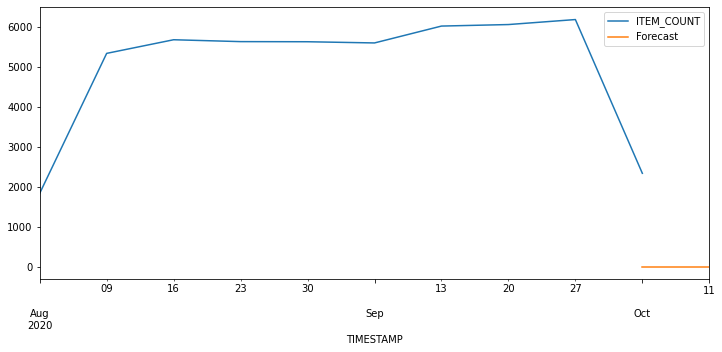

In [117]:
# Fit into Sarimax Model and make the forecast for next week
model=model= SARIMAX(numberoforderinaweek['ITEM_COUNT'], order=(0,0,1), seasonal_order=(2,1,0,12))
resultinaweek= model.fit()
forecastinaweek= resultinaweek.predict(start=(len(numberoforderinaweek)-1), 
                        end=(len(numberoforderinaweek)), typ='levels').rename('Forecast')
numberoforderinaweek['ITEM_COUNT'].plot(figsize=(12,5), legend= True)
forecastinaweek.plot(legend=True)

Then, I will find the specific value of order number for nextweek

In [109]:
# Similarly, I converted the timeline in a week into an array of numerical values
weeklytimeline=pd.DataFrame(numberoforderinaweek.index)
weekinnumerical=pd.to_datetime(weeklytimeline['TIMESTAMP']).astype(int)/ 10**9
weekinnumerical= np.array(weekinnumerical)
weekinnumerical

array([1.5963264e+09, 1.5969312e+09, 1.5975360e+09, 1.5981408e+09,
       1.5987456e+09, 1.5993504e+09, 1.5999552e+09, 1.6005600e+09,
       1.6011648e+09, 1.6017696e+09])

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(weekinnumerical,orderofweek, 
                                                   test_size=0.2, random_state=0)
weeklyregressor= LinearRegression()
weeklyregressor.fit(X_train.reshape(-1,1), y_train)
print('coef is:', weeklyregressor.coef_)
print('intercept_ is:', weeklyregressor.intercept_)

coef is: [0.00010598]
intercept_ is: -164653.3189823875


Coef_ is from -1 to 1 so the value might be correctly predicted

In [132]:
# I will find the values of item_count in next weeks
predictionofnextweek= weeklyregressor.predict(X_test.reshape(-1,1))
predictionofnextweek

array([4651.39726027, 5035.97260274])

Next, I will change it into Series and combine it to the orginal dataframe of weeks

In [133]:
# I change the values of item_count in next weeks into dataframe
predictionofnextweek=pd.Series(predictionofnextweek)
predictionofnextweek=predictionofnextweek.loc[0]
predictionofnextweek

4651.397260273981

In [134]:
finalweek=weeklytimeline.loc[9]
finalweek

TIMESTAMP   2020-10-04
Name: 9, dtype: datetime64[ns]

In [135]:
import datetime
nextweek= timedelta(days=+7)
nextweek= finalweek + nextweek
#nextweek=pd.DateFrame(nextweek)
nextweek=pd.Series(nextweek)
nextweek

TIMESTAMP   2020-10-11
Name: 9, dtype: datetime64[ns]

In [87]:
final_prediction_next_week=pd.DataFrame({'Next Week Prediction of Item'
                              :predictionofnextweek,
                    }, index=nextweek)
final_prediction_next_week

,Next Week Prediction of Item
9,
2020-10-11,4651.39726


And finally, we have a data frame like this

In [88]:
numberoforderinaweek.append(final_prediction_next_week)

,ITEM_COUNT,Next Week Prediction of Item
2020-08-02,1834.0,NaN
2020-08-09,5335.0,NaN
2020-08-16,5676.0,NaN
2020-08-23,5629.0,NaN
2020-08-30,5626.0,NaN
2020-09-06,5596.0,NaN
2020-09-13,6018.0,NaN
2020-09-20,6056.0,NaN
2020-09-27,6181.0,NaN
2020-10-04,2335.0,NaN
